[tuto chargement dataset coco](https://docs.voxel51.com/)

In [2]:
#installation des librairies
!pip install --upgrade fiftyone

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.8/37.8 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 564.5/564.5 KB 51.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.1/492.1 KB 48.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.8/226.8 KB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.1/135.1 KB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━

In [3]:
!pip install torchvision -q

In [ ]:
import os

In [ ]:
#!pip install fiftyone -q

[data coco](https://ichi.pro/fr/comment-travailler-avec-des-ensembles-de-donnees-de-detection-d-objets-au-format-coco-171476491192484)

[ récupération data coco](https://ichi.pro/fr/l-ensemble-de-donnees-coco-meilleures-pratiques-pour-le-telechargement-la-visualisation-et-l-evaluation-115052911361975)

In [4]:
#chargement de données coco
import fiftyone.zoo as foz
dataset = foz.load_zoo_dataset(
    "coco-2017",
    split="validation",
    label_types=["detections"],
    #classes=["person", "car", "truck", "traffic light"],
    classes=["cat", "dog","apple","orange"],
    max_samples=50,
    dataset_dir ="/content/datasetcoco",
    overwrite=True)

Migrating database to v0.19.1


INFO:fiftyone.migrations.runner:Migrating database to v0.19.1


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/content/datasetcoco/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/content/datasetcoco/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [17.9s elapsed, 0s remaining, 127.4Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [17.9s elapsed, 0s remaining, 127.4Mb/s]      


Extracting annotations to '/content/datasetcoco/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/content/datasetcoco/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 50 images


 100% |████████████████████| 50/50 [12.4s elapsed, 0s remaining, 4.1 images/s]      


INFO:eta.core.utils: 100% |████████████████████| 50/50 [12.4s elapsed, 0s remaining, 4.1 images/s]      


Writing annotations for 50 downloaded samples to '/content/datasetcoco/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 50 downloaded samples to '/content/datasetcoco/validation/labels.json'


Dataset info written to '/content/datasetcoco/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/content/datasetcoco/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |███████████████████| 50/50 [258.1ms elapsed, 0s remaining, 196.7 samples/s]     


INFO:eta.core.utils: 100% |███████████████████| 50/50 [258.1ms elapsed, 0s remaining, 196.7 samples/s]     


Dataset 'coco-2017-validation-50' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-50' created


[fiftyOne](https://docs.voxel51.com/user_guide/model_zoo/index.html)


[doc model en fiftyOne](https://docs.voxel51.com/user_guide/model_zoo/models.html)


[pytorch detection objet](https://debuggercafe.com/faster-rcnn-object-detection-with-pytorch/)

### exploration de données 

In [5]:

import fiftyone as fo
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("coco-2017", 
                               split="validation",
                               classes=["cat", "dog","apple","orange"],
                               max_samples=200,
                               shuffle=True)

# chargment du modèle pré-entrainé
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")
dataset.apply_model(model, label_field="predictions")

# détection
results = dataset.evaluate_detections(
    "predictions", gt_field="ground_truth", eval_key="eval", compute_mAP=True,
 classwise=False)

# affichage map
print(results.mAP())
# ex: 0.358

session = fo.launch_app(dataset)

# Convert to evaluation patches
eval_patches = dataset.to_evaluation_patches("eval")
print(eval_patches)


INFO:fiftyone.zoo.datasets:Downloading split 'validation' to '/root/fiftyone/coco-2017/validation' if necessary


INFO:fiftyone.utils.coco:Downloading annotations to '/root/fiftyone/coco-2017/tmp-download/annotations_trainval2017.zip'


 100% |██████|    1.9Gb/1.9Gb [16.8s elapsed, 0s remaining, 134.8Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.9Gb/1.9Gb [16.8s elapsed, 0s remaining, 134.8Mb/s]      


Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Extracting annotations to '/root/fiftyone/coco-2017/raw/instances_val2017.json'


INFO:fiftyone.utils.coco:Downloading 200 images


 100% |██████████████████| 200/200 [50.5s elapsed, 0s remaining, 4.3 images/s]      


INFO:eta.core.utils: 100% |██████████████████| 200/200 [50.5s elapsed, 0s remaining, 4.3 images/s]      


Writing annotations for 200 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


INFO:fiftyone.utils.coco:Writing annotations for 200 downloaded samples to '/root/fiftyone/coco-2017/validation/labels.json'


Dataset info written to '/root/fiftyone/coco-2017/info.json'


INFO:fiftyone.zoo.datasets:Dataset info written to '/root/fiftyone/coco-2017/info.json'


Loading 'coco-2017' split 'validation'


INFO:fiftyone.zoo.datasets:Loading 'coco-2017' split 'validation'


 100% |█████████████████| 200/200 [1.1s elapsed, 0s remaining, 190.3 samples/s]         


INFO:eta.core.utils: 100% |█████████████████| 200/200 [1.1s elapsed, 0s remaining, 190.3 samples/s]         


Dataset 'coco-2017-validation-200' created


INFO:fiftyone.zoo.datasets:Dataset 'coco-2017-validation-200' created


INFO:fiftyone.core.models:Downloading model from 'https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth'...


 100% |██████|    1.2Gb/1.2Gb [20.8s elapsed, 0s remaining, 221.2Mb/s]      


INFO:eta.core.utils: 100% |██████|    1.2Gb/1.2Gb [20.8s elapsed, 0s remaining, 221.2Mb/s]      
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

 100% |█████████████████| 200/200 [30.6s elapsed, 0s remaining, 9.2 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 200/200 [30.6s elapsed, 0s remaining, 9.2 samples/s]      


Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 200/200 [7.6s elapsed, 0s remaining, 37.8 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 200/200 [7.6s elapsed, 0s remaining, 37.8 samples/s]       


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 200/200 [4.5s elapsed, 0s remaining, 52.1 samples/s]       


INFO:eta.core.utils: 100% |█████████████████| 200/200 [4.5s elapsed, 0s remaining, 52.1 samples/s]       


0.3206331726963421


Dataset:     coco-2017-validation-200
Media type:  image
Num patches: 2900
Patch fields:
    id:           fiftyone.core.fields.ObjectIdField
    sample_id:    fiftyone.core.fields.ObjectIdField
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.ImageMetadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    crowd:        fiftyone.core.fields.BooleanField
    type:         fiftyone.core.fields.StringField
    iou:          fiftyone.core.fields.FloatField
View stages:
    1. ToEvaluationPatches(eval_key='eval', config=None)


In [6]:
#interface d'exploration des données
session = fo.launch_app(dataset)


In [ ]:
# chargment du modèle pré-entrainé
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")
dataset.apply_model(model, label_field="predictions")

# détection
results = dataset.evaluate_detections(
    "predictions", gt_field="ground_truth", eval_key="eval", compute_mAP=True,
 classwise=False)

# affichage map
print(results.mAP())
# ex: 0.358

## utilisation de nos propre données

In [ ]:
#fonction de détection
from torchvision.io.image import read_image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
import os
def detection_object(img):
  img = read_image(img)

  # initialisation du modèle avec les poids pré-entrainé
  weights =FasterRCNN_ResNet50_FPN_V2_Weights.COCO_V1.DEFAULT
  model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
  model.eval()
  # inference des poids pré-entrainé sur nos images
  preprocess = weights.transforms()
  batch = [preprocess(img)]
  #définissons nos classes
  name_classse=["cat","dog","orange","apple"]
  # application pour détecter les images
  prediction = model(batch)[0]
  labels = [weights.meta["categories"][i] for i in prediction["labels"]]
  labels=[label for label in labels if label in name_classse]
  box = draw_bounding_boxes(img, boxes=prediction["boxes"],
                            labels=labels,
                            colors="red",
                            width=4, font_size=30)
  im = to_pil_image(box.detach())
  im.show()

/usr/local/lib/python3.9/dist-packages/torchvision/utils.py:232: UserWarning:

Argument 'font_size' will be ignored since 'font' is not set.



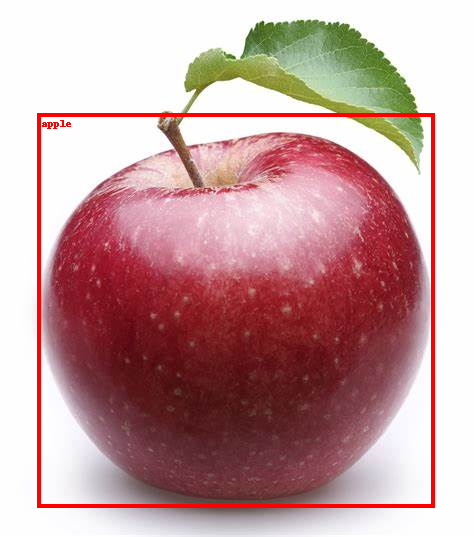

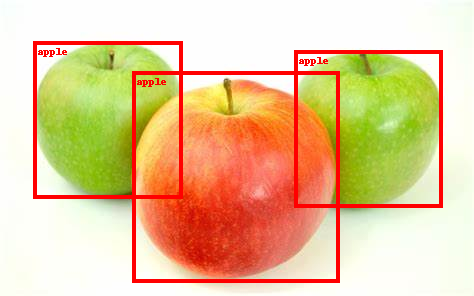

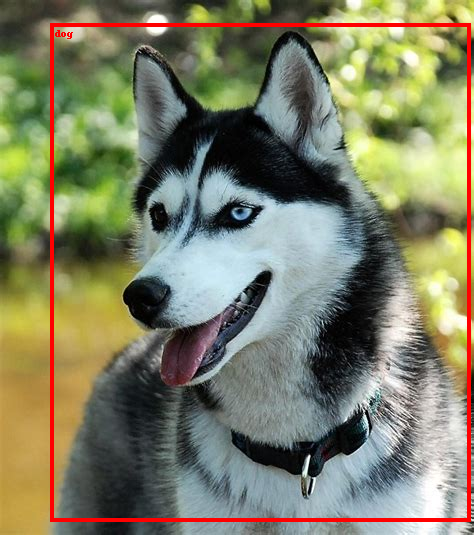

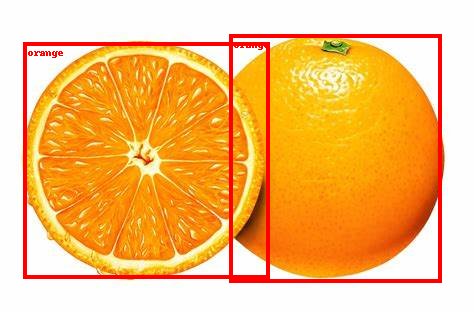

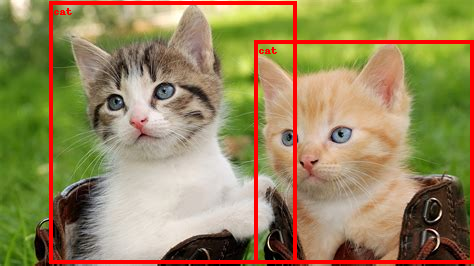

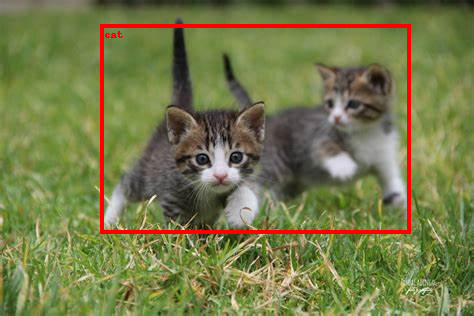

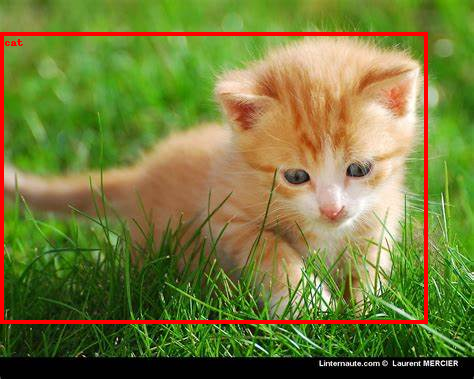

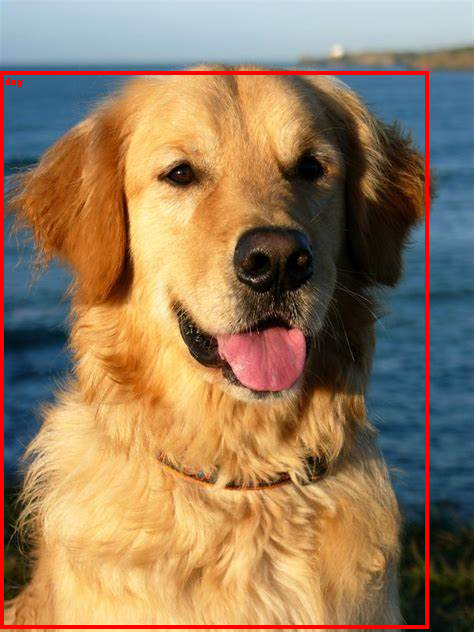

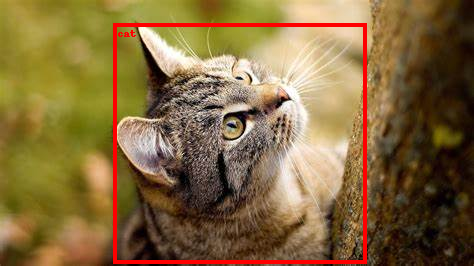

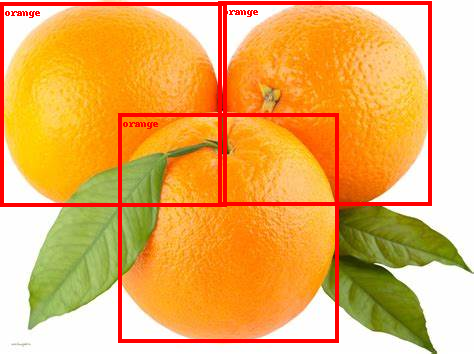

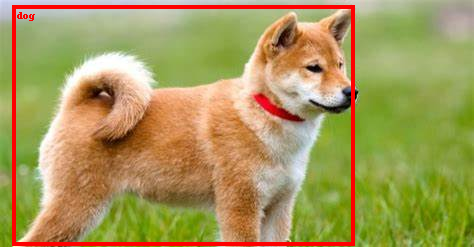

In [ ]:
#utilisation de la fonction pour détecter les images
os.chdir("/content/imges")
#chargement des images
directory="/content/imges"
url_img=[img for img in os.listdir(os.path.join(directory))]
#détection
for img in url_img:
      detection_object(img)

In [ ]:
import fiftyone as fo
import fiftyone.zoo as foz
# objets à détecter
classes = ["dog", "cat","apple","orange"]
#initialisation du modèle pré-entrainé
model = foz.load_zoo_model("faster-rcnn-resnet50-fpn-coco-torch")

#résultats
results = dataset.evaluate_detections(
"predictions", gt_field="ground_truth", eval_key="eval_predictions", classwise=False,compute_mAP=True)

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning:

The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning:

Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.



Evaluating detections...


INFO:fiftyone.utils.eval.detection:Evaluating detections...


 100% |█████████████████| 200/200 [8.0s elapsed, 0s remaining, 36.0 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 200/200 [8.0s elapsed, 0s remaining, 36.0 samples/s]      


Performing IoU sweep...


INFO:fiftyone.utils.eval.coco:Performing IoU sweep...


 100% |█████████████████| 200/200 [4.6s elapsed, 0s remaining, 51.2 samples/s]      


INFO:eta.core.utils: 100% |█████████████████| 200/200 [4.6s elapsed, 0s remaining, 51.2 samples/s]      


In [ ]:
#voir attributs et  les méthodes de l'obejt model
print(dir(model))       

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_benchmark_orig', '_build_output_processor', '_build_transforms', '_classes', '_device', '_download_model', '_embeddings_layer', '_load_model', '_load_network', '_load_state_dict', '_mask_targets', '_model', '_no_grad', '_output_processor', '_parse_classes', '_parse_mask_targets', '_parse_skeleton', '_predict_all', '_preprocess', '_ragged_batches', '_skeleton', '_store_logits', '_transforms', '_using_gpu', '_using_half_precision', 'classes', 'config', 'device', 'embed', 'embed_all', 'from_config', 'from_dict', 'from_json', 'from_kwargs', 'get_embeddings', 'has_embeddings', 'has_logits', 'mask_targets', 'media_type', 'num_

In [ ]:
counts = dataset.count_values("ground_truth.detections.label")
print("total classe:",len(counts))
class1 = sorted(counts, key=counts.get, reverse=True)[:10]
class1


total classe: 62


['person',
 'orange',
 'dog',
 'apple',
 'cat',
 'book',
 'chair',
 'bowl',
 'car',
 'cup']

In [ ]:
print(results.mAP())
# ex: 0.358

0.32907682987926523


In [ ]:
#la matriced de confusion
results.confusion_matrix(classes=classes)

array([[ 72,   3,   0,   0],
       [  2,  85,   0,   0],
       [  0,   0,  48,   2],
       [  0,   0,   2, 102]])

In [ ]:
# Afficher les attributs et les méthodes de l'objet "results"
dir(results)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_classwise_AP',
 '_confusion_matrix',
 '_from_dict',
 '_get_class_index',
 '_get_iou_thresh_inds',
 '_parse_classes',
 '_prepare_serial_dict',
 '_samples',
 'attributes',
 'classes',
 'cls',
 'confs',
 'confusion_matrix',
 'copy',
 'custom_attributes',
 'eval_key',
 'from_dict',
 'from_json',
 'from_str',
 'get_class_name',
 'gt_field',
 'iou_threshs',
 'ious',
 'mAP',
 'metrics',
 'missing',
 'plot_confusion_matrix',
 'plot_pr_curves',
 'precision',
 'pred_field',
 'print_report',
 'recall',
 'report',
 'serialize',
 'thresholds',
 'to_str',
 'weights',
 'write_json',
 'ypred',
 'ypred_ids',
 'ytrue',
 'ytrue_ids']

In [ ]:
#affichage de tous les metrics globals du modèles qui est un objet dict
metrics = results.metrics()
print(metrics)

{'accuracy': 0.3568641362185172, 'precision': 0.4092758340113914, 'recall': 0.6876281613123718, 'fscore': 0.5131344044886509, 'support': 1463}


In [ ]:
#évaluation des resultats
res=results.print_report(classes=classes)

              precision    recall  f1-score   support

         dog       0.63      0.86      0.72        83
         cat       0.63      0.92      0.75        90
       apple       0.33      0.50      0.40       112
      orange       0.45      0.80      0.58       142

   micro avg       0.48      0.76      0.59       427
   macro avg       0.51      0.77      0.61       427
weighted avg       0.49      0.76      0.59       427



In [ ]:
#matrice de confusion
plot = results.plot_confusion_matrix(classes=classes)
plot.show()

/usr/local/lib/python3.9/dist-packages/fiftyone/core/plots/plotly.py:1575: UserWarning:

Interactive plots are currently only supported in Jupyter notebooks. Support outside of notebooks and in Google Colab will be included in an upcoming release. In the meantime, you can still use this plot, but note that (i) selecting data will not trigger callbacks, and (ii) you must manually call `plot.show()` to launch a new plot that reflects the current state of an attached session.

See https://docs.voxel51.com/user_guide/plots.html#working-in-notebooks for more information.



In [ ]:
# les stats sur les vrai positif, faux positifs et faux négatif
print("TP: %d" % dataset.sum("eval_tp"))
print("FP: %d" % dataset.sum("eval_fp"))
print("FN: %d" % dataset.sum("eval_fn"))

TP: 1444
FP: 1541
FN: 471


In [ ]:
#Vous pouvez calculer les courbes de précision moyenne moyenne (mAP) 
#et de précision-rappel (PR) pour vos objets en passant le compute_mAP=True de la méthode evaluate_detections()
plot1 = results.plot_pr_curves(classes=classes)
plot1.show()

In [ ]:
print(results.mAP())

0.32907682987926523


In [ ]:
print(metrics)

{'accuracy': 0.3568641362185172, 'precision': 0.4092758340113914, 'recall': 0.6876281613123718, 'fscore': 0.5131344044886509, 'support': 1463}


In [ ]:
len(dataset)

In [ ]:
print(dir(results))

In [ ]:
cat_count = dataset.count_values("ground_truth.detections.label")["cat"]
dog_count = dataset.count_values("ground_truth.detections.label")["dog"]

print("Nombre d'images étiquetées 'cat': ", cat_count)
print("Nombre d'images étiquetées 'dog': ", dog_count)


Nombre d'images étiquetées 'cat':  90
Nombre d'images étiquetées 'dog':  94


In [ ]:
results_detect = dataset.evaluate_detections("predictions", gt_field="ground_truth", eval_key="eval", classes=["cat", "dog"], compute_mAP=True)


In [ ]:
print(results_detect.print_report())

In [ ]:
num_images_with_both = 0
for sample in dataset:
    detections = sample["ground_truth"]["detections"]
    if any(d["label"] == "dog" for d in detections) and any(d["label"] == "cat" for d in detections):
        num_images_with_both += 1

print(f"{num_images_with_both} images contiennent à la fois 'dog' et 'cat'")


3 images contiennent à la fois 'dog' et 'cat'


In [ ]:
import pandas as pd

# Récupérer les IoUs et mAP de l'objet 'results'
ious = results.ious
mAP = results.mAP

# Convertir les IoUs en un DataFrame Pandas
ious_df = pd.DataFrame.from_dict(ious)
ious_df.columns = ['IoU']

# Afficher le DataFrame contenant les IoUs
print(ious_df)
print("************")
# Afficher le mAP
print("mAP: ", mAP)


           IoU
0     0.931158
1     0.765089
2     0.786327
3         None
4         None
...        ...
2814  0.814293
2815  0.659368
2816   0.97535
2817      None
2818      None

[2819 rows x 1 columns]
************
mAP:  <bound method COCODetectionResults.mAP of <fiftyone.utils.eval.coco.COCODetectionResults object at 0x7f9d63140f40>>
